In [3]:
from Preprocessing.data_clean import remove_221_rows, dropping_no_betting_data, josh_features, fill_f_pm_01m, class_or_rating_average, oli_features
from Preprocessing.V2.v2_preprocessor import preprocess_features_v2
import pandas as pd

data  = pd.read_csv("../../../raw_data/raw_data_v2.2.csv")

data_cleaned = remove_221_rows(data)
data_cleaned = dropping_no_betting_data(data_cleaned)
data_cleaned = josh_features(data_cleaned)
data_cleaned = class_or_rating_average(data_cleaned)
data_cleaned = oli_features(data_cleaned)
data_cleaned = fill_f_pm_01m(data_cleaned)



preprocessed_data = preprocess_features_v2(data_cleaned)

preprocessed_data.to_csv("../../../raw_data/data_cleaned_and_preprocessed.csv", index=False)

data = pd.read_csv("../../../raw_data/data_cleaned_and_preprocessed.csv")
data.sort_values(by='f_ko')
data = data.reset_index(drop=True)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/3599952594.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data  = pd.read_csv("../../../raw_data/raw_data_v2.2.csv")


first 221 rows removed. New shape = (118354, 116)


/Users/joshstone/code/lucasglanville/and_theyre_off_backend/Preprocessing/data_clean.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_to_impute] = data[columns_to_impute].apply(impute_row, axis=1)


Cleaned up missing odds. New shape = (118093, 116)
Added Josh features. New shape = (118093, 123)
Added Oli features 2/4. New shape = (118093, 125)
Added Oli features 4/4. New shape = (118093, 127)
number of columns:  128
✅ DROPPED IRRELEVANT COLUMNS
✅ DROPPED ROWS WITH NULL VALUES
✅ WHITESPACE STRIPPED FROM 'f_track'
✅ ODDS CONVERTED TO PROBABILITY (1/ODDS)
✅ WINNERS CODED AS '1', REST '0'
✅ 'f_ko' CONVERTED TO DATETIME
✅ TRACK CONDITIONS ORDINALLY ENCODED
✅ NUMERIC FEATURES MINMAX-SCALED
✅ IMPUTED 'no_headgear' for NULLS IN 'f_headgear'
✅ IMPUTED MEAN FOR NULLS IN 'f_dob' & 'f_prb_avg'
✅ IMPUTED '0' FOR NULLS IN 68 x FEATURES
✅ CAT. FEATURES OH-ENCODED (Track, Headgear, Country)
number of columns:  88
✅ COLUMN TRANSFORMER ASSEMBLED
⏳ FIT_TRANSFORMING THE PREPROCESSING PIPE...
number of columns:  164
✅ DATA PROCESSED WITH SHAPE: (117468, 164)


In [4]:
data = data[(data['f_pm_01m'] <= 50)]
data = data.reset_index(drop=True)
print(data.shape)
backtest = data[['f_ko','f_id', 'id','f_horse','f_pm_01m', 'linear_target', 'f_place']]
data['pred_isp_prob'] = 1 / data['pred_isp']
data['linear_target_prob'] = 1 / data['linear_target']

(102875, 164)


In [5]:
data.head(2)

,f_going,average_or_rating_class,above_below_official_rating_class,PreviousPosition,PredictedRank,f_distance,f_class,f_age,f_pace,f_weight,...,f_id,f_ko,f_horse,pred_isp,f_place,f_pm_01m,f_pm_01m_p_back,linear_target,pred_isp_prob,linear_target_prob
0,0.4,0.836105,0.643877,0.0,0.000000,0.0,0.166667,0.25,0.7,0.21875,...,16149939000030,2021-03-06 01:25:00,Tone The Barone,0.400000,0,2.28,-1.0,-1.0,2.5,-1.0
1,0.4,0.836105,0.691321,0.0,0.032258,0.0,0.166667,0.50,0.5,0.34375,...,16149939000030,2021-03-06 01:25:00,Blue De Vega,0.222222,0,10.00,-1.0,-1.0,4.5,-1.0


In [6]:

X = data[['stall_position', 
          'iv_trainer_l16r', 'iv_jockey_l16r',
          'ae_trainer_l16r' ,'ae_jockey_l16r', 'pred_isp_prob', 'f_runners']]

# X = data[['f_runners','or_rating_vs_avg_race', 'stall_position', 
#           'iv_horse_at', 'iv_trainer_l200r', 'iv_trainer_l50r', 'iv_trainer_l16r', 'iv_trainer_at',
#           'iv_jockey_l200r', 'iv_jockey_l50r', 'iv_jockey_l16r', 'iv_jockey_at',
#           'ae_horse_l10r', 'ae_horse_l5r' , 'ae_horse_l2r' ,'ae_horse_at',
#           'ae_trainer_l200r' , 'ae_trainer_l50r' , 'ae_trainer_l16r' , 'ae_trainer_at',
#           'ae_jockey_l200r' , 'ae_jockey_l50r', 'ae_jockey_l16r' , 'ae_jockey_at' , 'pred_isp']]

#'f_dob', 'f_prb_avg',





y = data[["f_place"]] #OR 'linear_target'

print(data.shape)
print(X.shape)
print(y.shape)
print(backtest.shape)

#Train = Year 1
#Val = Year 2
#Test = Year 3 (6 months)

print(X.head(2))
print(y.head(2))

(102875, 166)
(102875, 7)
(102875, 1)
(102875, 7)
   stall_position  iv_trainer_l16r  iv_jockey_l16r  ae_trainer_l16r  \
0        0.148019              0.0             0.5              0.0   
1        0.480479              0.0             0.0              0.0   

   ae_jockey_l16r  pred_isp_prob  f_runners  
0        0.014276            2.5    0.15625  
1        0.000000            4.5    0.15625  
   f_place
0        0
1        0


In [7]:
X_train = X.iloc[:40000]
X_val = X.iloc[40000:70000]
X_test = X.iloc[70000:]
y_train = y.iloc[:40000]
y_val = y.iloc[40000:70000]
y_test = y.iloc[70000:]
backtest_train = backtest.iloc[:40000]
backtest_val = backtest.iloc[40000:70000]
backtest_test = backtest.iloc[70000:]

In [8]:
X_train_val = X.iloc[:70000]
y_train_val = y.iloc[:70000]

In [9]:
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 7)
(40000, 1)
(32875, 1)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(criterion = 'log_loss', random_state=0)
clf.fit(X_train_val, y_train_val)
# print(clf.predict([[0, 0, 0, 0]]))
# [1]

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='log_loss', random_state=0)

In [11]:
y_pred = clf.predict_proba(X_test)

In [12]:
y_pred

array([[1.        , 0.        ],
       [0.99      , 0.01      ],
       [0.97      , 0.03      ],
       ...,
       [0.95      , 0.05      ],
       [0.91      , 0.09      ],
       [0.84666667, 0.15333333]])

<Axes: ylabel='Count'>

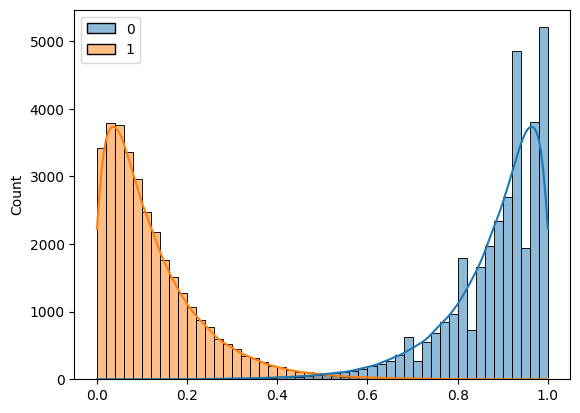

In [13]:
import seaborn as sns
sns.histplot(y_pred, bins = 50, kde=True)

In [14]:
backtest_test['model_preds'] = y_pred[:, 1:2]
backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
backtest_test['model_edge_basic'] = backtest_test['model_preds'] - backtest_test['odds_preds']
backtest_test['model_edge_proportionate'] = backtest_test['model_preds'] / backtest_test['odds_preds']
#backtest_test = backtest_test.drop(columns=['f_ko'])
model_preds_race = backtest_test.groupby('f_id').sum().reset_index()
model_preds_race2 = model_preds_race[['f_id', 'model_preds', 'odds_preds']]
dict_odds_preds = model_preds_race2.set_index('f_id')['odds_preds'].to_dict()
dict_race_preds = model_preds_race2.set_index('f_id')['model_preds'].to_dict()
backtest_test['race_model_preds'] = backtest_test['f_id'].map(dict_race_preds)
backtest_test['race_odds_preds'] = backtest_test['f_id'].map(dict_odds_preds)
backtest_test['model_preds_scaled'] = (backtest_test['model_preds'] / backtest_test['race_model_preds']) * backtest_test['race_odds_preds']
backtest_test['model_edge_basic_scaled'] = backtest_test['model_preds_scaled'] - backtest_test['odds_preds']
backtest_test['model_edge_prop_scaled'] = backtest_test['model_preds_scaled'] / backtest_test['odds_preds']
backtest_test['model_preds'] = round(backtest_test['model_preds'],2)
backtest_test.head(2)

/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2190457512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['model_preds'] = y_pred[:, 1:2]
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2190457512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backtest_test['odds_preds'] = 1/ backtest_test['f_pm_01m']
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2190457512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

,f_ko,f_id,id,f_horse,f_pm_01m,linear_target,f_place,model_preds,odds_preds,model_edge_basic,model_edge_proportionate,race_model_preds,race_odds_preds,model_preds_scaled,model_edge_basic_scaled,model_edge_prop_scaled
70000,2022-10-13 15:50:00,16656726000006,16656726000330,Rita Rana,22.0,-1.0,0,0.00,0.045455,-0.045455,0.000,0.06,0.238826,0.000000,-0.045455,0.000000
70001,2022-10-13 15:50:00,16656726000006,16656726000378,Sonnetina,7.2,-1.0,0,0.01,0.138889,-0.128889,0.072,0.06,0.238826,0.039804,-0.099085,0.286591


/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2052307414.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfall['cumulative_profit'] = dfall['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2052307414.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['cumulative_profit'] = df0['linear_target'].cumsum()
/var/folders/w6/wdkqbmf17b90n_r35p0cb7x00000gn/T/ipykernel_68311/2052307414.py:28: SettingWithCopyWarning: 
A value is trying to be set 

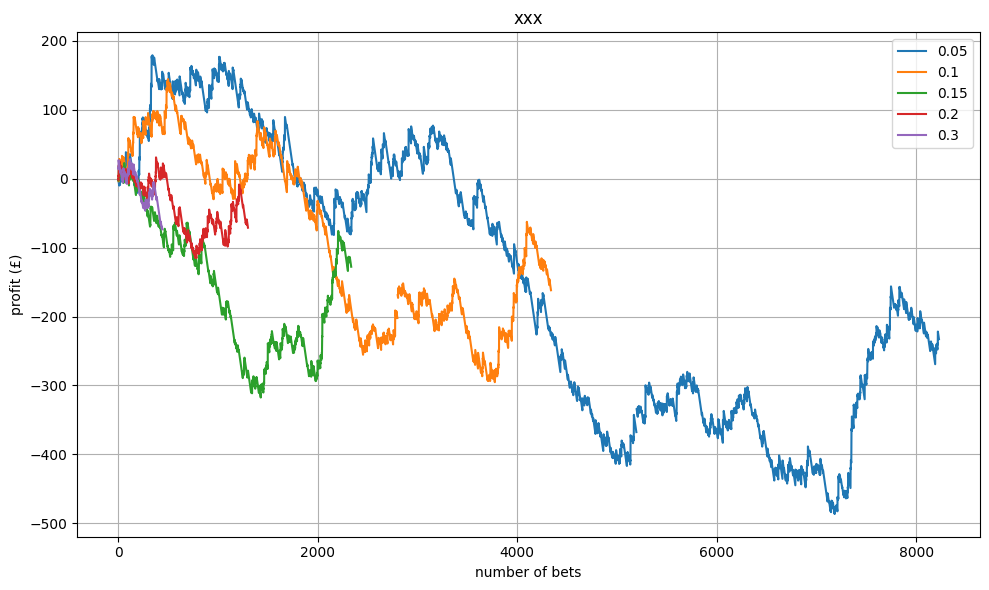

In [15]:
# Create dataframes of horses above specific proba_difference thresholds

# all_bets = backtest_test
# above0 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] < 2)]
# above5 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 2) & (backtest_test['f_pm_01m'] < 5)]
# above10 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 5) & (backtest_test['f_pm_01m'] < 10)]
# above15 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 10) & (backtest_test['f_pm_01m'] < 25)]
# above20 = backtest_test[(backtest_test['model_preds'] >= 0.5) & (backtest_test['f_pm_01m'] >= 25) & (backtest_test['f_pm_01m'] < 51)]
# above30 = backtest_test[backtest_test['model_preds'] >= 0.5]

all_bets = backtest_test
above0 = backtest_test[backtest_test['model_edge_basic'] >= 0]
above5 = backtest_test[backtest_test['model_edge_basic'] >= 0.05] 
above10 = backtest_test[backtest_test['model_edge_basic'] >= 0.1] 
above15 = backtest_test[backtest_test['model_edge_basic'] >= 0.15] 
above20 = backtest_test[backtest_test['model_edge_basic'] >= 0.2]
above30 = backtest_test[backtest_test['model_edge_basic'] >= 0.3]

# Calculate evolutions of profits for each threshold

dfall = all_bets
dfall['cumulative_profit'] = dfall['linear_target'].cumsum()

df0 = above0
df0['cumulative_profit'] = df0['linear_target'].cumsum()

df5 = above5
df5['cumulative_profit'] = df5['linear_target'].cumsum()

df10 = above10
df10['cumulative_profit'] = df10['linear_target'].cumsum()

df15 = above15
df15['cumulative_profit'] = df15['linear_target'].cumsum()

df20 = above20
df20['cumulative_profit'] = df20['linear_target'].cumsum()

df30 = above30
df30['cumulative_profit'] = df30['linear_target'].cumsum()

import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10,6))
#plt.plot(range(1, len(dfall) + 1), dfall['cumulative_profit'], label='all bets')
#plt.plot(range(1, len(df0) + 1), df0['cumulative_profit'], label='0')
plt.plot(range(1, len(df5) + 1), df5['cumulative_profit'], label='0.05')
plt.plot(range(1, len(df10) + 1), df10['cumulative_profit'], label='0.1')
plt.plot(range(1, len(df15) + 1), df15['cumulative_profit'], label='0.15')
plt.plot(range(1, len(df20) + 1), df20['cumulative_profit'], label='0.2')
plt.plot(range(1, len(df30) + 1), df30['cumulative_profit'], label='0.3')

plt.title("xxx")
plt.xlabel("number of bets")
plt.ylabel("profit (£)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()